**Dataset Information**

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
#statistical info

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,...,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000
mean,15492.416374,-0.244326,0.242420,0.745774,0.277011,-0.163264,0.092881,-0.145279,0.022237,0.636382,...,-0.047949,-0.146461,-0.038093,0.010678,0.122924,0.033127,0.014454,0.007312,70.271100,0.004272
std,10512.066686,1.889986,1.527342,1.767726,1.466218,1.430821,1.331029,1.338260,1.346813,1.278839,...,0.828385,0.637567,0.520683,0.591180,0.437675,0.530315,0.393002,0.244372,205.363789,0.065222
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.728650,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,4536.250000,-0.959632,-0.329008,0.309235,-0.636713,-0.745156,-0.657306,-0.599403,-0.171779,-0.209565,...,-0.259497,-0.563992,-0.174213,-0.333314,-0.138325,-0.341917,-0.069146,-0.010879,5.750000,0.000000
50%,14796.000000,-0.302521,0.220079,0.898672,0.224608,-0.199377,-0.175434,-0.072254,0.023822,0.620176,...,-0.115398,-0.118803,-0.046994,0.061181,0.160495,-0.036546,0.003868,0.019083,16.000000,0.000000
75%,26220.500000,1.164473,0.870117,1.532922,1.142143,0.341367,0.486735,0.448572,0.279960,1.409142,...,0.049521,0.254057,0.073666,0.398549,0.400713,0.332729,0.096281,0.077551,59.980000,0.000000
max,30633.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


In [4]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

Preprocessing the dataset

In [5]:
#check for null values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [6]:
df.fillna(0, inplace=True)

In [7]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Exploratory Data Analysis

<Axes: ylabel='count'>

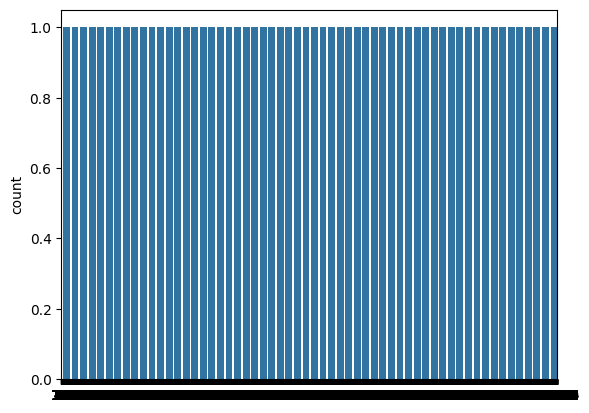

In [25]:
sns.countplot(df['Class'])

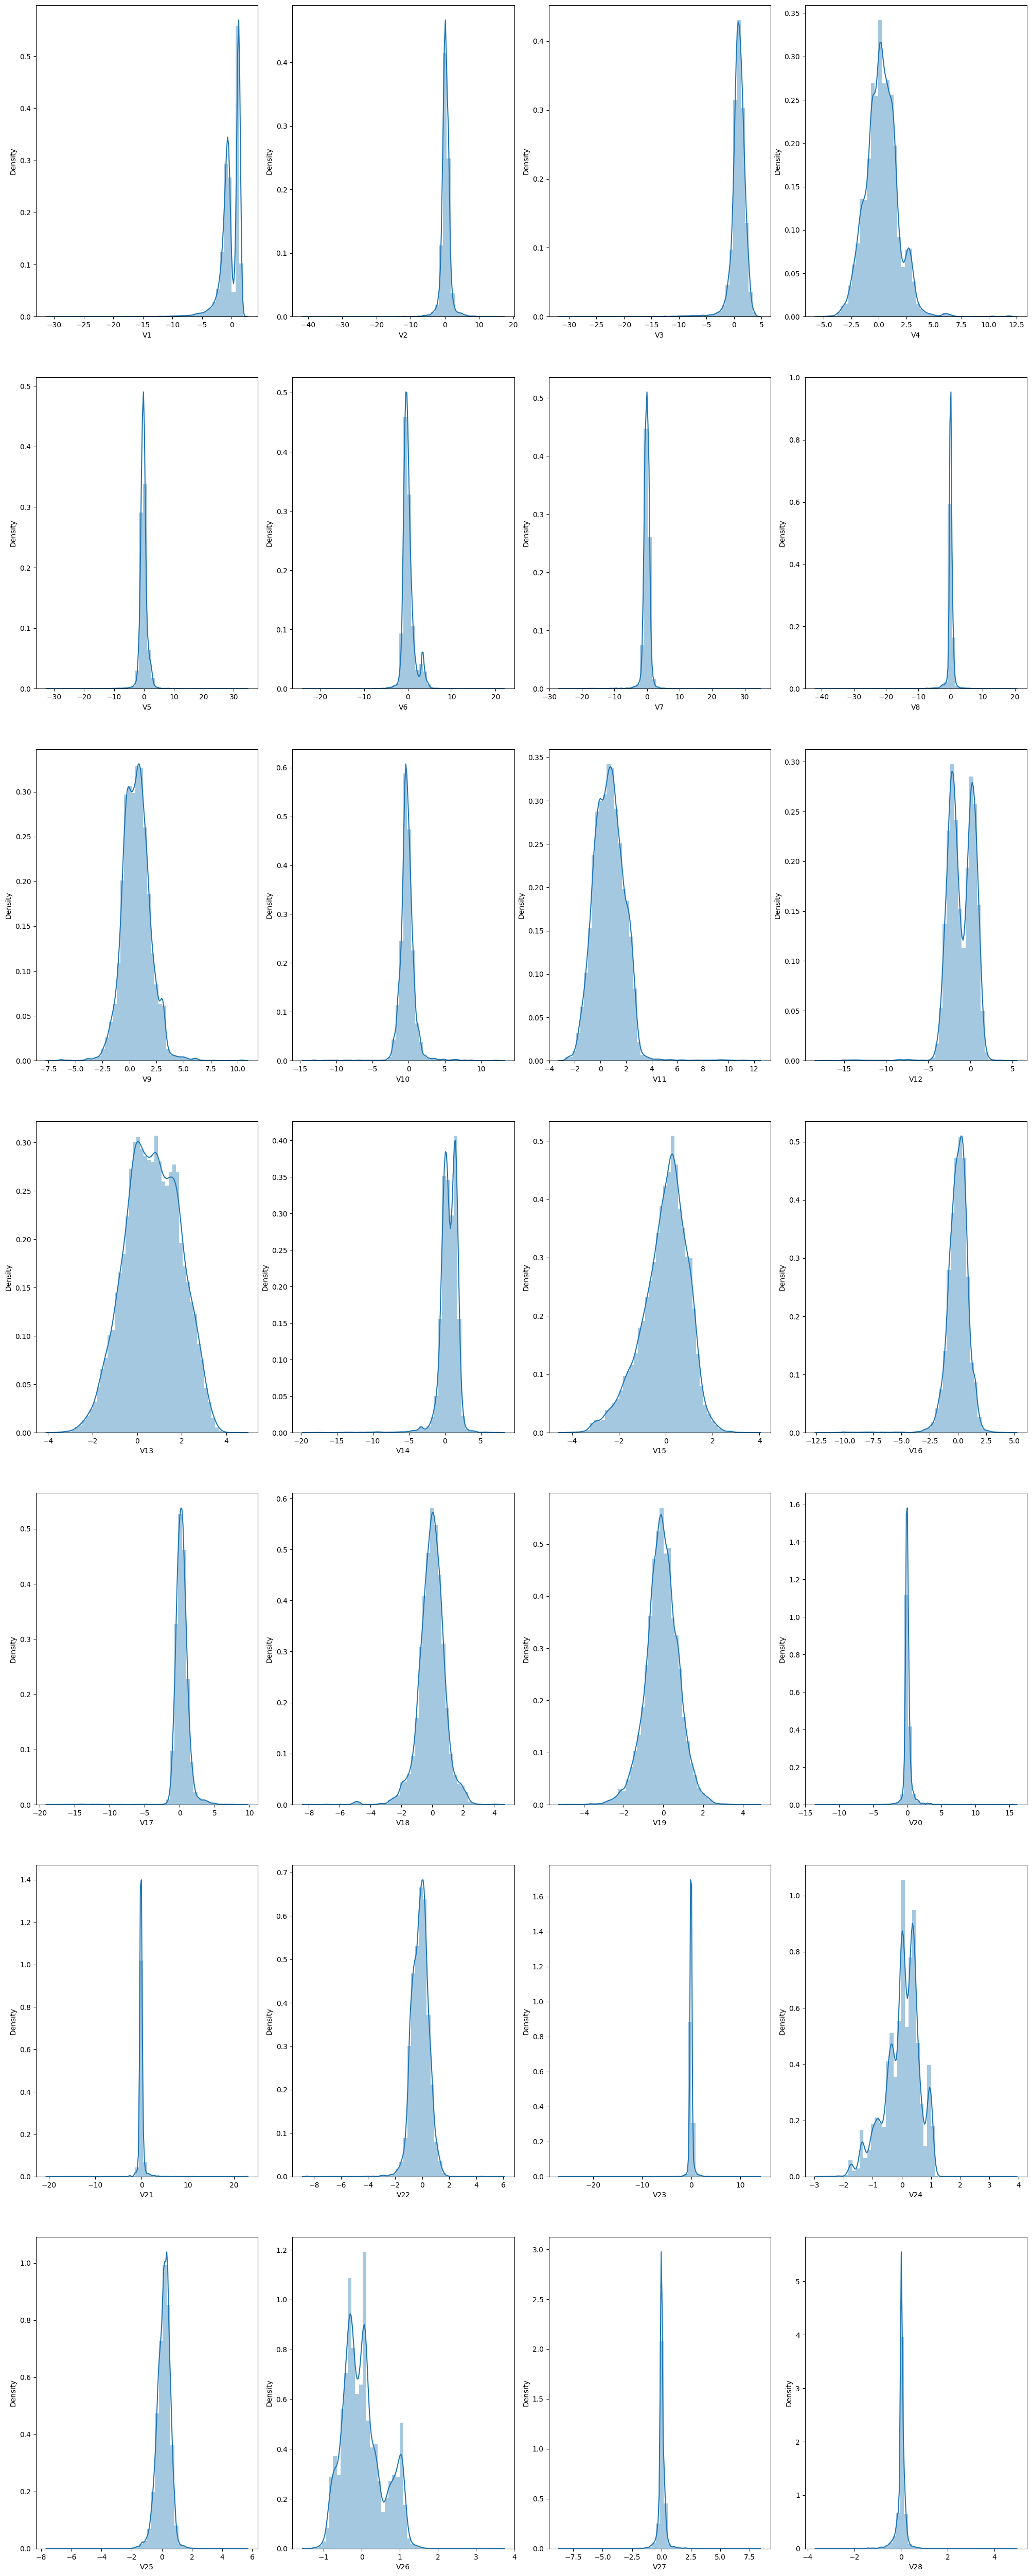

In [9]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<Axes: xlabel='Time', ylabel='Density'>

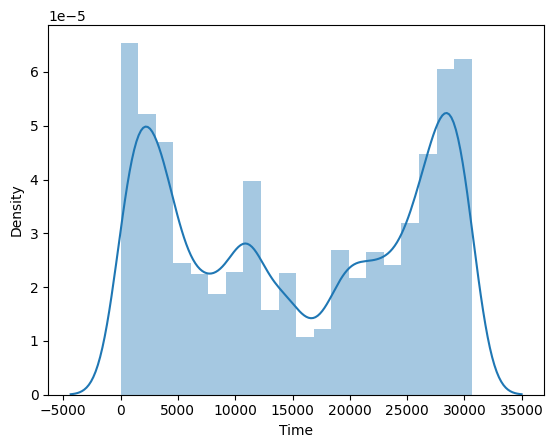

In [10]:
sns.distplot(df['Time'])

<Axes: xlabel='Amount', ylabel='Density'>

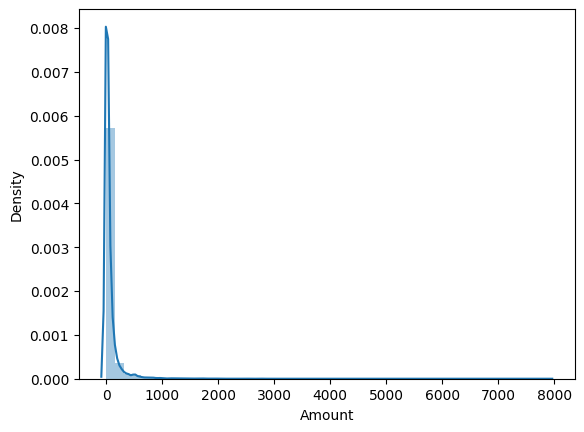

In [11]:
sns.distplot(df['Amount'])

Standard Scaling

In [13]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [15]:
x_scaler[-1]

array([ 1.44034133e+00, -1.25163589e+00,  1.46463117e+00,  1.02221923e-02,
       -1.58576285e-01, -3.37194158e-01,  5.03371866e-01, -1.10679039e+00,
       -5.67286253e+00,  5.96934370e-01,  1.00082231e+00, -5.73802703e-01,
        6.89818106e-01, -5.68084707e-01, -4.14932587e-01,  4.53536495e-02,
        5.11738112e-03, -2.33692984e-01,  5.26629254e-02,  8.02386062e-02,
       -6.18498936e-02,  5.78827591e-02,  2.29717605e-01,  7.31600452e-02,
       -1.80619270e-02, -2.80856834e-01, -6.24673839e-02, -3.67789955e-02,
       -2.99212332e-02, -3.42177625e-01])

Model Training

In [16]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4954
         1.0       0.84      0.76      0.80        21

    accuracy                           1.00      4975
   macro avg       0.92      0.88      0.90      4975
weighted avg       1.00      1.00      1.00      4975

F1 Score: 0.8


In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4954
         1.0       0.94      0.76      0.84        21

    accuracy                           1.00      4975
   macro avg       0.97      0.88      0.92      4975
weighted avg       1.00      1.00      1.00      4975

F1 Score: 0.8421052631578947


In [19]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4954
         1.0       1.00      0.86      0.92        21

    accuracy                           1.00      4975
   macro avg       1.00      0.93      0.96      4975
weighted avg       1.00      1.00      1.00      4975

F1 Score: 0.9230769230769231


From the above 3 models, best score is achieved with the help of xgboost.

Class Imbalancement

In [20]:
# hint - use combination of over sampling and under sampling
# balance the class with equal distribution
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      4954
         1.0       0.32      0.86      0.46        21

    accuracy                           0.99      4975
   macro avg       0.66      0.92      0.73      4975
weighted avg       1.00      0.99      0.99      4975

F1 Score: 0.46153846153846156


In [24]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4954
         1.0       0.89      0.81      0.85        21

    accuracy                           1.00      4975
   macro avg       0.95      0.90      0.92      4975
weighted avg       1.00      1.00      1.00      4975

F1 Score: 0.85


In [22]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4954
         1.0       0.95      0.90      0.93        21

    accuracy                           1.00      4975
   macro avg       0.97      0.95      0.96      4975
weighted avg       1.00      1.00      1.00      4975

F1 Score: 0.926829268292683


We observe that with the help of class balancement, we don't see much improvement in logistic regression or random forest classifier and only a slight improvement in XGBoost.

**CONCLUSION**

After performing all the steps of data analysis, evaluating different models, the best model we come across is XGBoost with F1 score of 92.68%